# MOHAMED EL GUENDOUZ
## Create KPI's

#### Import Mock Data

In [106]:
import pandas as pd

df = pd.read_csv("MOCK_DATA.csv")
df

,id,gender,first_name,last_name,age,job,country,salary
0,1,Male,Chlo,McKilroe,62,Software Consultant,Indonesia,4078
1,2,Female,Agustin,Piscopiello,63,Safety Technician II,China,2751
2,3,Female,Kalil,Ellingworth,39,Librarian,China,3656
3,4,Female,Ruprecht,Reye,65,Engineer III,Indonesia,1581
4,5,Female,Rudie,Brewitt,24,Research Assistant III,France,7432
...,...,...,...,...,...,...,...,...
777,778,Female,Prescott,Beste,27,Graphic Designer,Russia,3886
778,779,Male,Averil,Clausner,60,Administrative Officer,China,8124
779,780,Male,Camille,Hanning,43,Senior Sales Associate,Czech Republic,7684
780,781,Male,Judah,Haywood,47,Cost Accountant,Spain,3035


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 8 columns):
id            782 non-null int64
gender        782 non-null object
first_name    782 non-null object
last_name     782 non-null object
age           782 non-null int64
job           782 non-null object
country       782 non-null object
salary        782 non-null int64
dtypes: int64(3), object(5)
memory usage: 49.0+ KB


#### Quality Data

#### What is the gender balance in the company?

In [34]:
df_count_gender = df
df_count_gender["gender"].describe()

count      782
unique       2
top       Male
freq       398
Name: gender, dtype: object

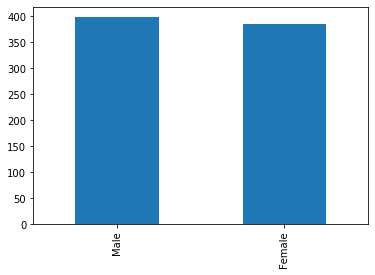

In [64]:
df_count_gender['gender'].value_counts().plot(kind='bar');

### KPI Gender

> KPI = number of gender most frequent / number total of salaries

In [61]:
KPI_Gender = df_count_gender["gender"].describe().freq/df_count_gender["gender"].count()
KPI_Gender

0.5089514066496164

### KPI Wage Gap

$$X = Women's average hourly wage$$
$$Y = Men's average hourly wage$$

$$Wage Gap =100\%-({X\over Y}\times100)$$

In [ ]:
X = 

### Visualise Proportion of salaries about job (TOP 10)

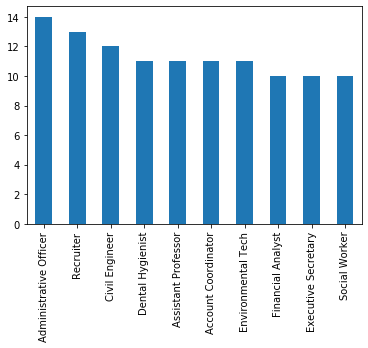

In [74]:
df['job'].value_counts().head(10).plot(kind='bar');

## Add others jobs in the visualisation

In [86]:
series_jobs = df['job'].value_counts().head(10)

sum_others_jobs = df_count_gender["job"].count() - series_jobs.sum()
series_jobs = series_jobs.append(pd.Series([sum_others_jobs], index=['Others']))

series_jobs

Administrative Officer     14
Recruiter                  13
Civil Engineer             12
Dental Hygienist           11
Assistant Professor        11
Account Coordinator        11
Environmental Tech         11
Financial Analyst          10
Executive Secretary        10
Social Worker              10
Others                    669
dtype: int64

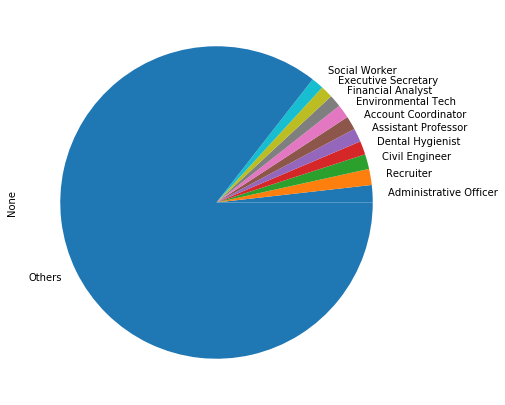

In [104]:
jobs_plot_pie = series_jobs.plot.pie(y='Proportion of jobs', subplots=True, figsize=(7, 20))